In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib
import pandas as pd

In [94]:
import random

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'
# rc('text', usetex=True)

In [4]:
outdir = "output"

## Multiobjective functions

In [6]:
data1 = pd.read_csv("../../data/multiobj_all.csv", sep=",", index_col=False)
data2 = pd.read_csv("../../data/multiobj_sel.csv", sep=",", index_col=False)

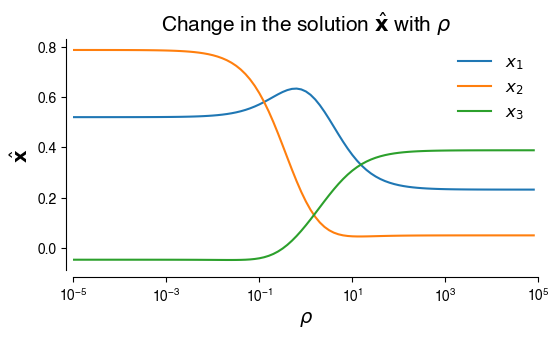

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.semilogx(data1.l, data1.x1, label="$x_1$")
ax.semilogx(data1.l, data1.x2, label="$x_2$")
ax.semilogx(data1.l, data1.x3, label="$x_3$")
ax.set_xlim(1e-5, 1e5)
ax.legend(loc="upper right", frameon=False, fontsize=12)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Offset the spines
ax.spines["left"].set_position(('outward', 5))
ax.spines["bottom"].set_position(('outward', 5))

ax.set_xlabel(r"$\rho$", fontsize=14)
ax.set_ylabel(r"$\hat{\mathbf{x}}$", fontsize=14)

ax.set_title(r"Change in the solution $\hat{\mathbf{x}}$ with $\rho$", fontsize=15) 

# Save figure
fig.savefig(pathlib.Path(outdir, "multiobj_soln.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "multiobj_soln.svg"), bbox_inches='tight')    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


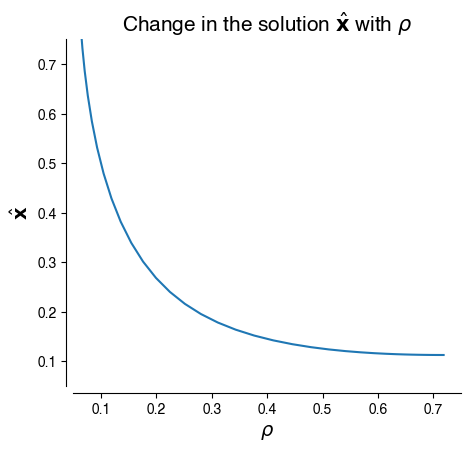

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))
ax.plot(data1.J1, data1.J2)
ax.set_xlim(0.05, 0.75)
ax.set_ylim(0.05, 0.75)
ax.legend(loc="upper right", frameon=False, fontsize=12)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Offset the spines
ax.spines["left"].set_position(('outward', 5))
ax.spines["bottom"].set_position(('outward', 5))

ax.set_xlabel(r"$\rho$", fontsize=14)
ax.set_ylabel(r"$\hat{\mathbf{x}}$", fontsize=14)

ax.set_title(r"Change in the solution $\hat{\mathbf{x}}$ with $\rho$", fontsize=15) 

# Save figure
fig.savefig(pathlib.Path(outdir, "multiobj_opt.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "multiobj_opt.svg"), bbox_inches='tight')    

In [200]:
data = pd.read_csv("../../assignment/data/ls/polyfit.csv")
# data = data.iloc[::2, :]

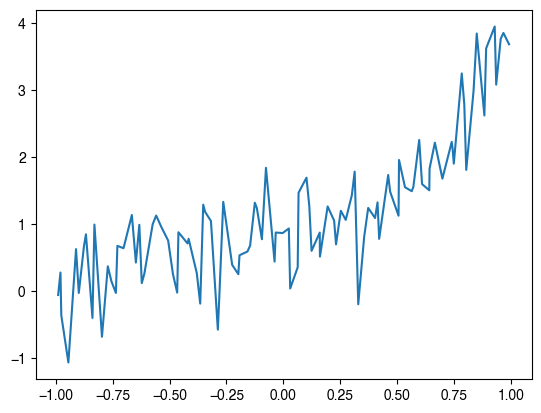

In [201]:
plt.plot(data["x"], data["y"])

In [202]:
# Vandermonde matrix
def get_vdm_row(x, n):
    return np.array([np.power(x, _n) for _n in range(n + 1)])

def get_vdm_matrix(x, n):
    return np.array([get_vdm_row(_x, n)
                     for _x in x])

def poly_fit(x, y, n):
    # Vandermonde matrix.
    A = get_vdm_matrix(x, n)
    b = y.reshape(-1, 1)
    return np.linalg.inv(A.T @ A) @ A.T @ b
    # return np.linalg.pinv(A) @ b

def poly_fit_reg(x, y, n, l):
    # Vandermonde matrix.
    A = get_vdm_matrix(x, n)
    b = y.reshape(-1, 1)
    return np.linalg.inv(A.T @ A + l * np.eye(n + 1)) @ A.T @ b

def poly_val(x, beta):
    _n = np.shape(beta)[0] - 1
    return get_vdm_matrix(x, _n) @ beta

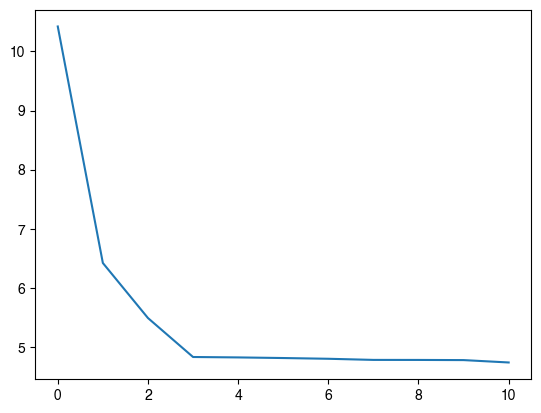

In [203]:
# Fit different order polynomials.
beta = [poly_fit(data["x"].values, data["y"].values, n)
        for n in range(11)]

# Predicted y values
y_pred = [poly_val(data["x"].values, beta[n]).T[0]
          for n in range(11)]

# Errors
err = y_pred - data["y"].values

plt.plot(np.linalg.norm(err, axis=1))

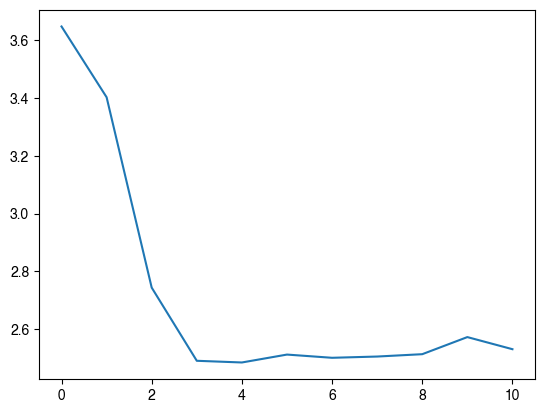

In [298]:
# With validate.
N = len(data)
train_inx = random.sample(list(range(N)), int(0.8 * N))
test_inx = [i for i in range(N) if i not in train_inx]

# Training and testing set.
data_train = data.iloc[train_inx, :]
data_test = data.iloc[test_inx, :]

# Fit to training set.
beta = [poly_fit(data_train["x"].values, data_train["y"].values, n)
        for n in range(11)]

# Predicted y values
y_pred = [poly_val(data_test["x"].values, beta[n]).T[0]
          for n in range(11)]

# Errors
err = y_pred - data_test["y"].values

plt.plot(np.linalg.norm(err, axis=1))

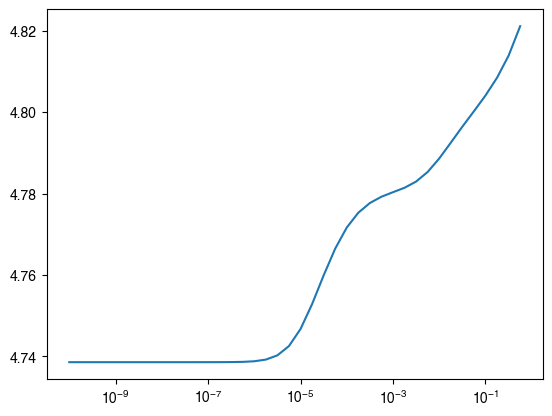

In [307]:
# Fit different order polynomials.
Ls = [np.power(10, i) for i in np.arange(-10, 0, 0.25)]
betal = [poly_fit_reg(data["x"].values, data["y"].values, 10, l)
         for l in Ls]

# Predicted y values
y_pred = [poly_val(data["x"].values, betal[i]).T[0]
          for i, _ in enumerate(Ls)]

# Errors
err = y_pred - data["y"].values

plt.semilogx(Ls, np.linalg.norm(err, axis=1))

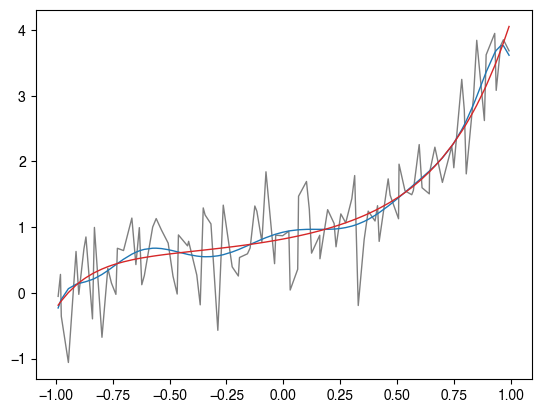

In [312]:
plt.plot(data["x"], data["y"], lw=1, color="black", alpha=0.5)
plt.plot(data["x"], y_pred[0], lw=1, color="tab:blue")
plt.plot(data["x"], y_pred[-1], lw=1, color="tab:red")

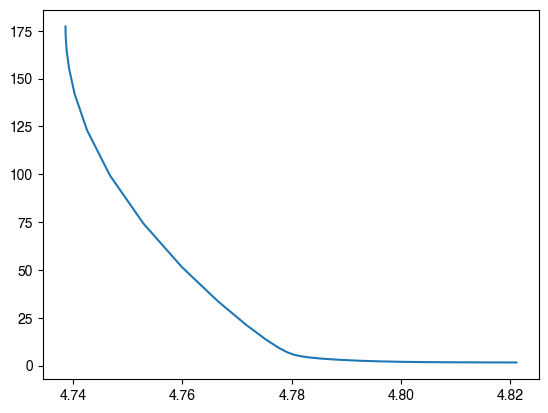

In [314]:
plt.plot(np.linalg.norm(err, axis=1),
         [np.linalg.norm(_b) for _b in betal])